In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 📌 Roles to Explore

To understand which job roles appear most frequently in the dataset, I first calculate the number of job postings for each role using `value_counts()`.

I then visualize the results using a horizontal bar chart.  
This provides a quick overview of the most common data job titles and helps identify which roles are most relevant to focus on during the rest of the analysis.

✅ **Why this matters:**  
By identifying the most frequently posted roles, I can prioritize exploring the job market around positions that employers are actively hiring for.


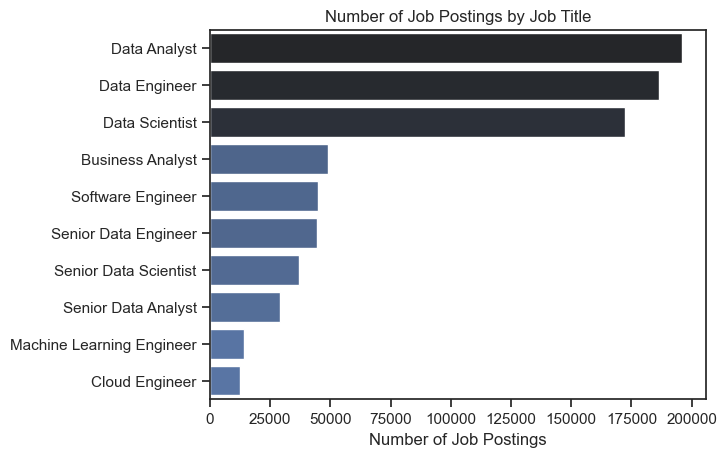

In [2]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')              #defining the theme
sns.barplot(data = df_plot,                 #plotting the barplot
            x = 'count',                    #x-axis
            y = 'job_title_short',          #y-axis
            hue = 'count',                 
            palette = 'dark:b_r',           #color palette
            legend=False                    #removing the legend
            )

plt.title('Number of Job Postings by Job Title')
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()

## 🌍 Countries to Explore

To understand where data job opportunities are most concentrated, I analyzed the geographic distribution of job postings by country.

I used `value_counts()` to calculate how many job listings appear in each country, then selected the **top 19 countries** with the highest number of postings. A horizontal bar chart is used to clearly compare hiring volume across regions.

✅ **Why this matters:**  
This helps identify the strongest job markets globally and provides context for comparing demand across different locations.


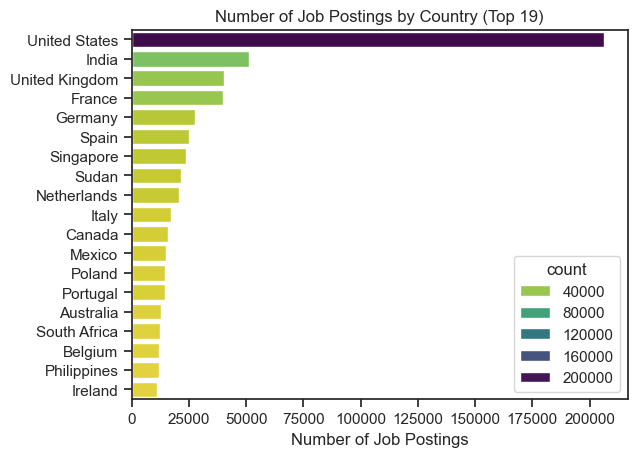

In [4]:
df_plot_countries = df['job_country'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_countries,
            x = 'count',
            y = 'job_country',
            hue = 'count',
            palette='viridis_r'
            
            )

plt.title('Number of Job Postings by Country (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


## 🏢 Companies to Explore

To identify which employers are posting the most data-related job opportunities, I analyzed the distribution of job postings by company.

I used `value_counts()` on the `company_name` column to calculate posting frequency and selected the **top 19 companies** with the highest number of job listings. The results are visualized using a horizontal bar chart, making it easy to compare which organizations are most active in hiring.

✅ **Why this matters:**  
This analysis highlights the companies with the strongest hiring presence in the dataset and helps identify potential target employers for job seekers.


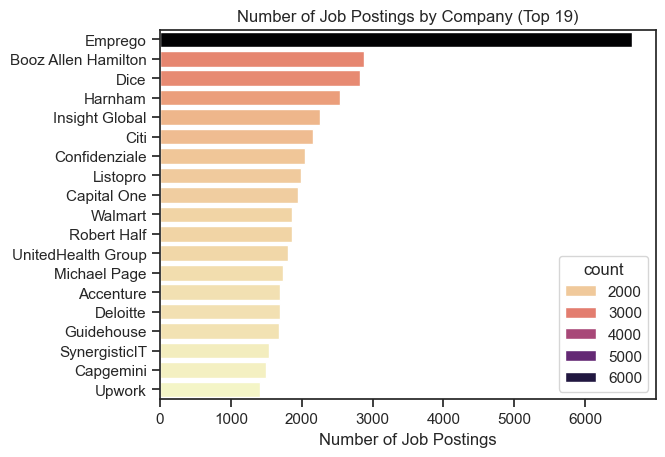

In [5]:
df_plot_com = df['company_name'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_com,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette='magma_r'
            
            )
plt.title('Number of Job Postings by Company (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


## 💼 Job Opportunities (Work From Home, Degree Requirements, Benefits)

In this section, I explore job posting features that can directly impact the quality and accessibility of opportunities for candidates.

Specifically, I analyze three key attributes:

- **Work From Home (`job_work_from_home`)** — identifies remote-friendly roles  
- **No Degree Mention (`job_no_degree_mention`)** — highlights jobs that do not explicitly require a degree  
- **Health Insurance (`job_health_insurance`)** — checks how often job postings include benefits  

To make comparison easy, I visualize each category using pie charts displayed side by side.  
This provides a quick view of how common these job benefits and requirements are across job postings.

✅ **Why this matters:**  
These factors help job seekers understand which roles offer more flexibility, require fewer formal credentials, and provide stronger employee benefits.


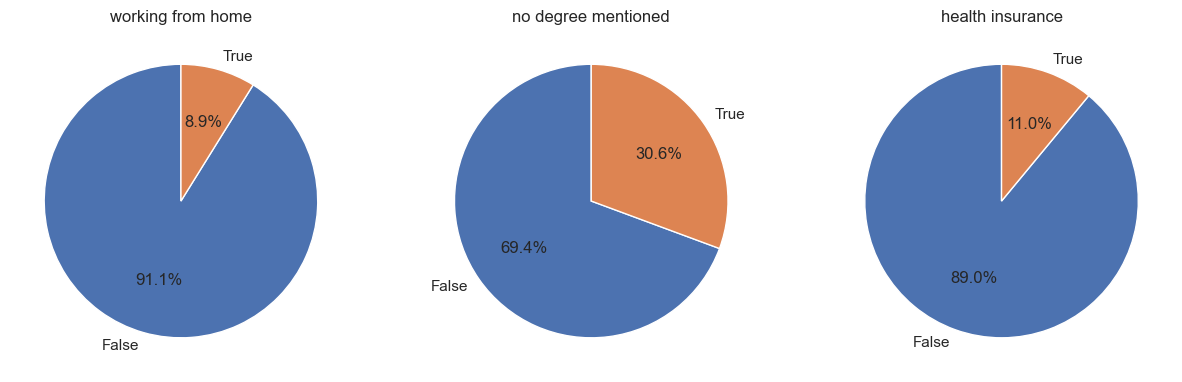

In [6]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

# Creating subplots
fig, ax = plt.subplots(1,3, figsize = (15,5))  

# Plotting pie charts
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df[column].value_counts(), labels = [False, True], startangle = 90, autopct = '%1.1f%%')
    ax[i].set_title(title)

plt.show()

## Filter for US Data Analyst roles

In [7]:
df_US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()


## 📍 Locations to Explore (U.S. Data Analyst Roles)

To better understand where Data Analyst opportunities are most concentrated in the United States, I analyzed job postings by **job location**.

I calculated the frequency of each location using `value_counts()` and selected the **top 19 locations** with the highest number of postings. The results are displayed in a horizontal bar chart to make location-based comparisons easier.

✅ **Why this matters:**  
This visualization highlights the cities and regions with the strongest hiring activity, helping identify where demand for Data Analysts is highest and where job seekers may find more opportunities.


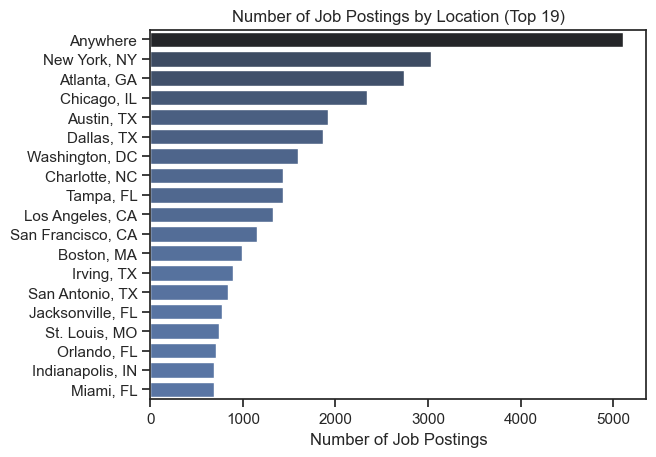

In [8]:
df_loca = df_US_DA['job_location'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_loca,
            x = 'count',
            y = 'job_location',
            hue = 'count',
            palette = 'dark:b_r',
            legend=False
            )

plt.title('Number of Job Postings by Location (Top 19)')
plt.xlabel('Number of Job Postings')        
plt.ylabel('')
plt.show()


## 💼 Job Opportunities (U.S. Data Analyst Roles)

In this section, I analyze key job features that influence the attractiveness and accessibility of Data Analyst roles in the United States.

I focus on three important job attributes:

- **Remote Work Availability** (`job_work_from_home`)  
- **Degree Requirement Not Mentioned** (`job_no_degree_mention`)  
- **Health Insurance Provided** (`job_health_insurance`)  

To clearly compare these categories, I visualize each variable using pie charts placed side-by-side.  
This provides an easy way to understand how common these opportunities and benefits are across U.S. Data Analyst job postings.

✅ **Why this matters:**  
These insights help job seekers identify roles that offer flexibility (remote work)



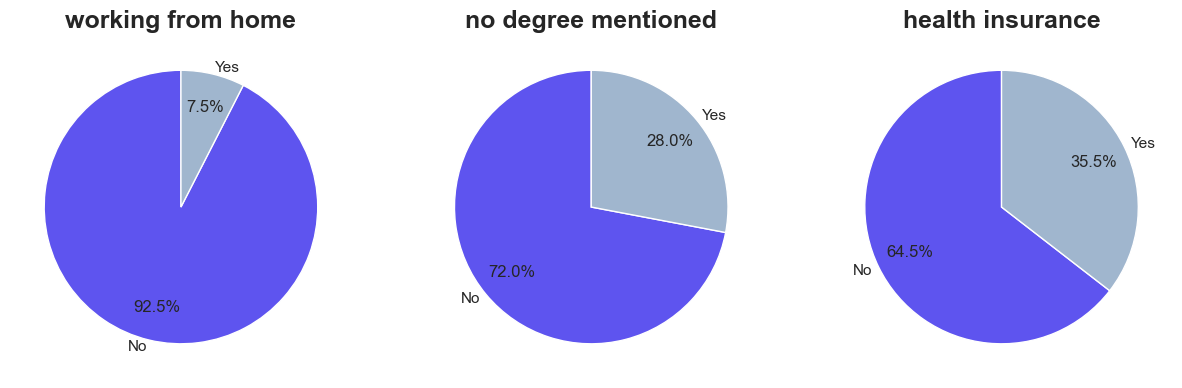

In [9]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df_US_DA[column].value_counts(),
                labels = ['No', 'Yes'],
                startangle = 90,
                autopct = '%1.1f%%',
                colors = ["#5E54EF", "#a0b6ce"],
                pctdistance=0.75,
                labeldistance=1.05,
                         )
    
    ax[i].set_title(title, fontsize=18,  fontweight="bold")
plt.show()

## 🏢 Companies to Explore (Top 10 Employers)

To identify which employers are most actively hiring for **Data Analyst roles in the United States**, I analyzed the frequency of job postings by company.

Using `value_counts()` on the `company_name` column, I selected the **top 10 companies** with the highest number of job listings and visualized the results using a horizontal bar chart.

✅ **Why this matters:**  
This highlights the organizations with the strongest hiring presence for U.S. Data Analyst positions and helps job seekers identify potential target employers for applications and research.


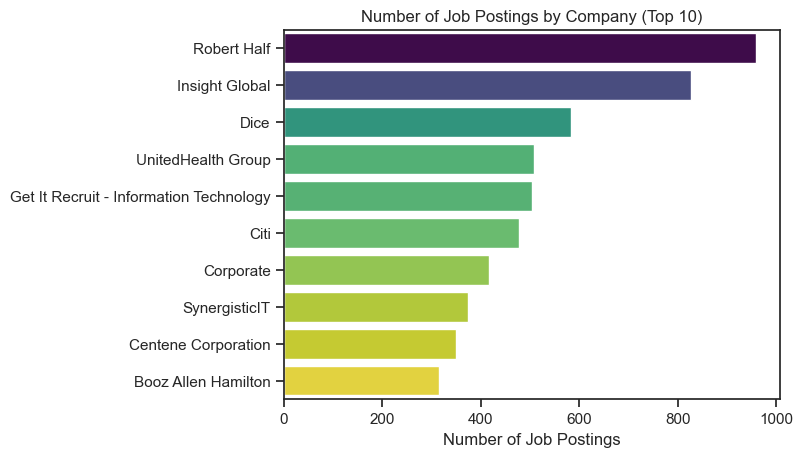

In [10]:
df_compa = df_US_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_compa,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette = 'viridis_r',
            legend=False
            )

plt.title('Number of Job Postings by Company (Top 10)') 
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()

